<a href="https://colab.research.google.com/github/ProsperChuks/classification-on-the-MNIST-database/blob/main/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### getting the MNIST dataset

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

(60000, 28, 28)


### building the model

In [61]:
model = tf.keras.models.Sequential()
# creating first layer(input layer)
model.add(tf.keras.layers.Flatten())

# creating 2 hidden layers with 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# creating the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0713 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0386 - accuracy: 0.9874


### checking if the model overfitted

In [86]:
val_loss, val_acc = model.evaluate(x_test, y_test)

print('%.2f'%(val_loss * 100),'%', 'Loss')
print('%.2f'%(val_acc * 100),'%', 'Accuracy')

313/313 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9685
10.10 % Loss
96.85 % Accuracy


### prediction

9


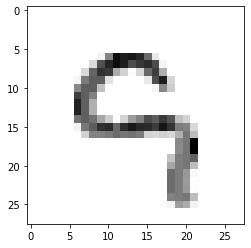

In [95]:
predict = model.predict(x_test)

predict = np.argmax(predict[104])
print(predict)

plt.imshow(x_test[104], cmap=plt.cm.binary)
plt.show()